In [1]:
import numpy as np
from numpy.linalg import inv
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.svm import SVR, LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

<h3>Linear SVR</h3>

In [12]:
X = np.random.randn(100,1) + 2.5
y = 3 + 2.3 * X[:,0] + np.random.randn(100)

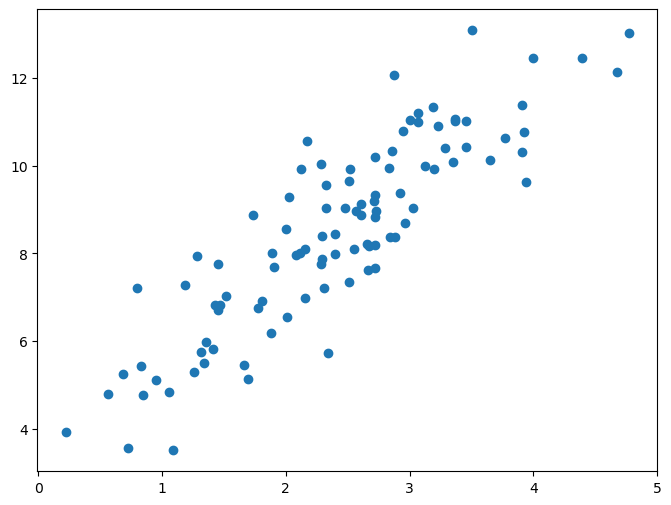

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y);

In [14]:
def linear_svm_reg(X, y):
    param_dist = {
        'epsilon': np.linspace(0.1, 5.0, 1000),
        'C': np.linspace(0.1, 10.0, 1000)
    }
    random_search = RandomizedSearchCV(estimator=LinearSVR(fit_intercept=True, max_iter=100000, random_state=42),
                                       param_distributions=param_dist,
                                       n_iter=10000,
                                       cv=10,
                                       refit=True,
                                       scoring='neg_mean_squared_error',
                                       n_jobs=-1)
    random_search.fit(X, y)
    return random_search

In [15]:
model1 = linear_svm_reg(X, y)

In [16]:
model1.best_params_

{'epsilon': np.float64(0.12942942942942942),
 'C': np.float64(7.443243243243244)}

In [17]:
def plot_best_fit_line(X, y, b0, b1):
    # Linear regression
    X_b = sm.add_constant(X)
    beta = inv(X_b.T @ X_b) @ X_b.T @ y[:,np.newaxis]
    y_hat_lr = X_b @ beta
    
    # Plot both SVM best-fit line and OLS best-fit line
    fig, ax = plt.subplots(figsize=(8,6))
    y_hat = b0 + b1 * X[:,0]
    ax.scatter(X, y, facecolors='none', edgecolors='black')
    ax.plot(X, y_hat, 'r', linewidth=1.0, label='SVR')
    ax.plot(X, y_hat_lr, 'b', linewidth=1.0, label='OLS')
    ax.legend();

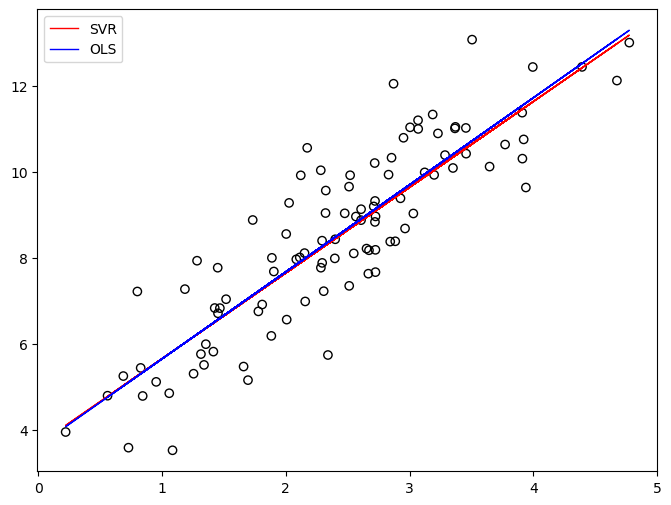

In [18]:
plot_best_fit_line(X, y, model1.best_estimator_.intercept_, model1.best_estimator_.coef_)

- Note that since we can see both the red and blue lines, they are not the same.
- Linear SVM regression gives a slightly different result, as they have different objective functions, and `LinearSVM` has some hyperparameters.

<h3>Polynomial SVR</h3>

In [29]:
X = np.linspace(-3, 3, 100)[:, np.newaxis]
y = 3 + 1.8 * X[:,0]**2 + np.random.randn(100)

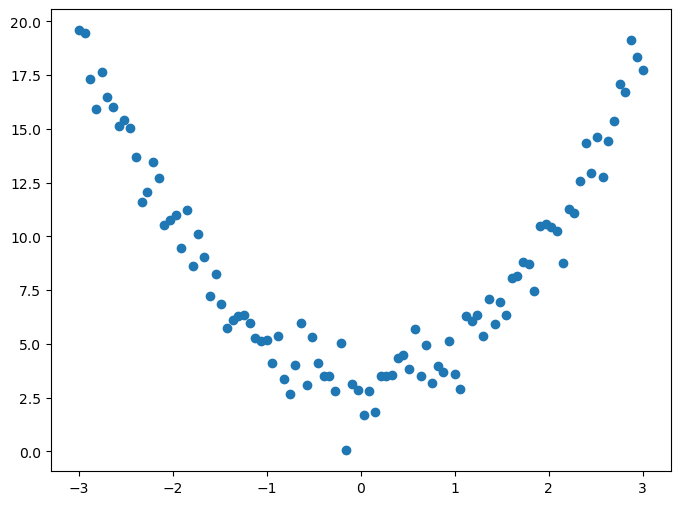

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y);

In [39]:
def poly_svr(X, y):
    param_dist = {
        'coef0': np.linspace(0.1, 5.0, 1000),
        'C': np.linspace(0.1, 10.0, 1000),
        'gamma': np.linspace(0.0, 5.0, 100)
    }
    random_search = RandomizedSearchCV(estimator=SVR(kernel='poly', degree=2),
                                       param_distributions=param_dist,
                                       n_iter=10000,
                                       cv=10,
                                       refit=True,
                                       scoring='neg_mean_squared_error',
                                       n_jobs=-1)
    random_search.fit(X, y)
    return random_search

In [40]:
model2 = poly_svr(X, y)

In [41]:
best_poly_svr = model2.best_estimator_

In [42]:
best_poly_svr.get_params()

{'C': np.float64(2.6171171171171177),
 'cache_size': 200,
 'coef0': np.float64(3.410810810810811),
 'degree': 2,
 'epsilon': 0.1,
 'gamma': np.float64(1.2626262626262625),
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [43]:
# Generate a smooth range of X values to predict on
x_vals = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]

# Make a prediction on each point
y_pred_poly_svr = best_poly_svr.predict(x_vals)

In [44]:
def plot_poly_svr(X, y, y_pred_poly_svr):    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(X, y, facecolors='none', edgecolors='black')
    ax.plot(X, y_pred_poly_svr, 'r', linewidth=1.0, label='Poly SVR')
    ax.set_xlabel('X1')
    ax.set_ylabel('y')

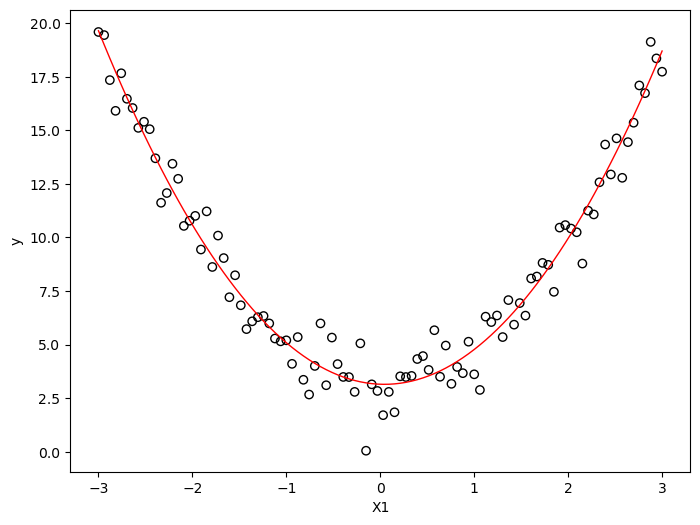

In [45]:
plot_poly_svr(X, y, y_pred_poly_svr)

If we wish to lower the variance (and add bias) to the model, we can regularize the model by lowering `C` and `gamma`.

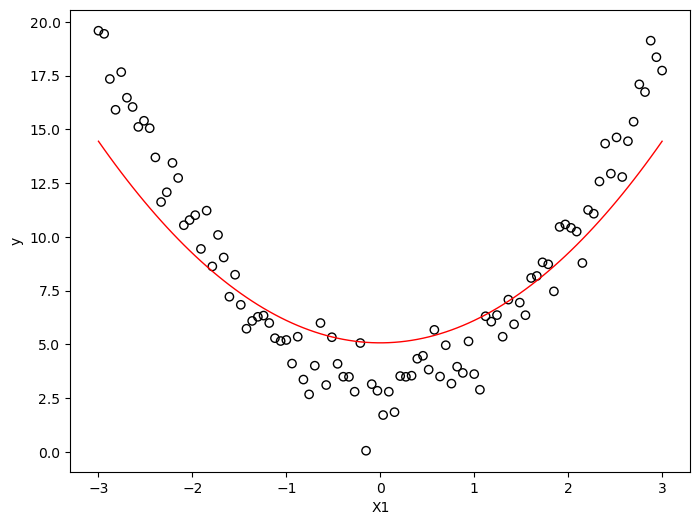

In [54]:
model3 = SVR(kernel='poly', degree=2, C=0.5, gamma=0.1)
model3.fit(X, y)
plot_poly_svr(X, y, model3.predict(x_vals))

- As can be seen, the more we decrease `C` and `gamma`, the more constrained the model is
- This means that we are lowering the variance of the model at the cost of adding some bias.